PEDRO CABELLO MONDRAGON
FELIX ENRIQUE CHAVEZ NAVARRO

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
mipath = "australian.dat"
data = pd.read_csv(mipath,sep=" ", header=None)
data.columns= ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","class"]

In [3]:
data.info

<bound method DataFrame.info of      A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14   
0     1  22.08  11.460   2   4   4  1.585   0   0    0    1    2  100  1213  \
1     0  22.67   7.000   2   8   4  0.165   0   0    0    0    2  160     1   
2     0  29.58   1.750   1   4   4  1.250   0   0    0    1    2  280     1   
3     0  21.67  11.500   1   5   3  0.000   1   1   11    1    2    0     1   
4     1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   60   159   
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...   ...   
685   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2    0     1   
686   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2    0    45   
687   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2  100     1   
688   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2  120    12   
689   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1  560     1   

     class  
0     

In [4]:
X=data.iloc[:,:-1]
y=data[["class"]]

In [5]:
print("Total de datos: ",y.shape[0])
print("Total de datos de la clase positiva: ",sum(y["class"]))

print("porcentaje de datos de la clase positiva (1): %.1f%%"%(100*sum(y["class"])/y.shape[0]))
print("porcentaje de datos de la clase positiva (1): %.1f%%"%(100*(1-sum(y["class"])/y.shape[0])))

Total de datos:  690
Total de datos de la clase positiva:  307
porcentaje de datos de la clase positiva (1): 44.5%
porcentaje de datos de la clase positiva (1): 55.5%


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y , train_size=0.6,random_state=45)

In [7]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(414, 14)
(414, 1)
(276, 14)
(276, 1)


In [9]:
from sklearn.ensemble import RandomForestClassifier

n_for = 10
accAD = list()  #definimos la variable que guardara los resultados obtenidos
accAD2 = list()
for k in range(n_for):
    modelo_AD= RandomForestClassifier()# iniciamos el modelo por default
    modelo_AD.fit(X_train, y_train)   #entrenando el modelo
    tmp = modelo_AD.score(X_test, y_test)  # validando el modelo
    accAD.append(tmp)
    
    modelo_AD2 = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2,min_samples_leaf=1)
    modelo_AD2.fit(X_train, y_train)   #entrenando el modelo
    tmp2 = modelo_AD2.score(X_test, y_test)  # validando el modelo
    accAD2.append(tmp2)
    
print('Random forest con parametros por default\nPrmedio y desviacion estandar: %.1f%% (%.1f)'%(100*np.mean(accAD),100*np.std(accAD)))
print('Random forest con parametros ajustados\nTrain:\t%.2f%%\nTest:\t%.2f%%'%(modelo_AD2.score(X_train,y_train)*100, modelo_AD2.score(X_test,y_test)*100))


C:\Users\felix\AppData\Local\Temp\ipykernel_6264\3093398688.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train, y_train)   #entrenando el modelo
C:\Users\felix\AppData\Local\Temp\ipykernel_6264\3093398688.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD2.fit(X_train, y_train)   #entrenando el modelo
C:\Users\felix\AppData\Local\Temp\ipykernel_6264\3093398688.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train, y_train)   #entrenando el modelo
C:\Users\felix\AppData\Local\Temp\ipykernel_6264\3093398688.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

Random forest con parametros por default
Prmedio y desviacion estandar: 88.6% (0.7)
Random forest con parametros ajustados
Train:	100.00%
Test:	88.41%


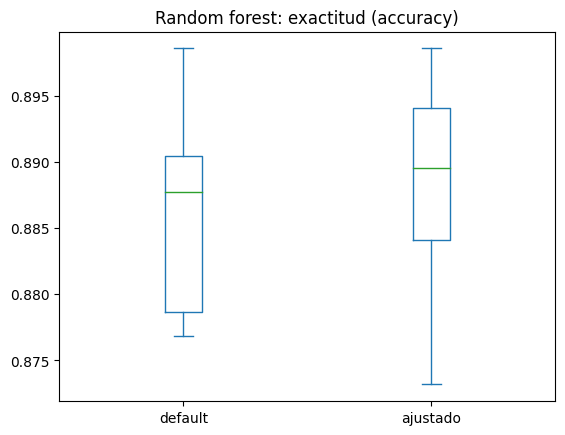

In [10]:

ddff=pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])

ddff.plot(kind='box')
plt.title('Random forest: exactitud (accuracy)')
plt.show()

In [11]:
from sklearn.svm import LinearSVC

n_for = 10
accAD = list()  #definimos la variable que guardara los resultados obtenidos
accAD2 = list()
for k in range(n_for):
    modelo_AD= LinearSVC()# iniciamos el modelo por default
    modelo_AD.fit(X_train, y_train)   #entrenando el modelo
    tmp = modelo_AD.score(X_test, y_test)  # validando el modelo
    accAD.append(tmp)
    
    modelo_AD2 = LinearSVC(C=0.1,penalty="l1",dual=False)
    modelo_AD2.fit(X_train, y_train)   #entrenando el modelo
    tmp2 = modelo_AD2.score(X_test, y_test)  # validando el modelo
    accAD2.append(tmp2)
    
print('LinearSVC con parametros por default\nPrmedio y desviacion estandar: %.1f%% (%.1f)'%(100*np.mean(accAD),100*np.std(accAD)))
print('LinearSVC con parametros ajustados\nTrain:\t%.2f%%\nTest:\t%.2f%%'%(modelo_AD2.score(X_train,y_train)*100, modelo_AD2.score(X_test,y_test)*100))


c:\Users\felix\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\felix\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\felix\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\felix\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

LinearSVC con parametros por default
Prmedio y desviacion estandar: 81.4% (6.4)
LinearSVC con parametros ajustados
Train:	84.06%
Test:	89.13%


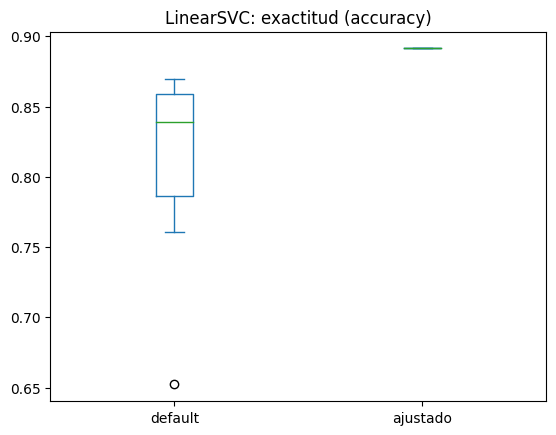

In [12]:
ddff=pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])

ddff.plot(kind='box')
plt.title('LinearSVC: exactitud (accuracy)')
plt.show()

El modelo LinearSVC mostró mejor resultado de score que el modelo Random forest